## Imports

In [2]:
from pycocotools.coco import COCO
import os
import shutil
import json
import random
import matplotlib.pyplot as plt
import cv2
import numpy as np
from tqdm import tqdm
print("Imports finalizados")

Imports finalizados


## Conteo de imágenes por categoría

In [5]:
# Ruta al archivo de anotaciones
annotations_path = r"F:\Train_IA\train2017\annotations\instances_train2017.json"
coco = COCO(annotations_path)

# Obtener todas las categorías
categories = coco.loadCats(coco.getCatIds())

# Contar imágenes por categoría
category_image_counts = {}
for category in categories:
    class_id = category['id']
    img_ids = coco.getImgIds(catIds=[class_id])  # Obtener IDs de imágenes para esta categoría
    category_image_counts[category['name']] = len(img_ids)  # Almacenar el conteo

# Mostrar el conteo general
for category_name, count in category_image_counts.items():
    print(f"{category_name}: {count}")

loading annotations into memory...
Done (t=21.47s)
creating index...
index created!
person: 64115
bicycle: 3252
car: 12251
motorcycle: 3502
airplane: 2986
bus: 3952
train: 3588
truck: 6127
boat: 3025
traffic light: 4139
fire hydrant: 1711
stop sign: 1734
parking meter: 705
bench: 5570
bird: 3237
cat: 4114
dog: 4385
horse: 2941
sheep: 1529
cow: 1968
elephant: 2143
bear: 960
zebra: 1916
giraffe: 2546
backpack: 5528
umbrella: 3968
handbag: 6841
tie: 3810
suitcase: 2402
frisbee: 2184
skis: 3082
snowboard: 1654
sports ball: 4262
kite: 2261
baseball bat: 2506
baseball glove: 2629
skateboard: 3476
surfboard: 3486
tennis racket: 3394
bottle: 8501
wine glass: 2533
cup: 9189
fork: 3555
knife: 4326
spoon: 3529
bowl: 7111
banana: 2243
apple: 1586
sandwich: 2365
orange: 1699
broccoli: 1939
carrot: 1683
hot dog: 1222
pizza: 3166
donut: 1523
cake: 2925
chair: 12774
couch: 4423
potted plant: 4452
bed: 3682
dining table: 11837
toilet: 3353
tv: 4561
laptop: 3524
mouse: 1876
remote: 3076
keyboard: 2115
c

## Creación de dataset

In [8]:
# Configuración de rutas
annotations_path = r"F:\Train_IA\train2017\annotations\instances_train2017.json"
images_dir = r"F:\Train_IA\train2017\train2017"
output_dir = r"F:\Train_IA\train2017\BalancedDataset"


if os.path.exists(f'{output_dir}/images'):
    shutil.rmtree(f'{output_dir}/images')

if os.path.exists(f'{output_dir}/annotations'):
    shutil.rmtree(f'{output_dir}/annotations')
    
    
# Crear directorios de salida
os.makedirs(f'{output_dir}/images', exist_ok=True)
os.makedirs(f'{output_dir}/annotations', exist_ok=True)

# Cargar el dataset COCO
coco = COCO(annotations_path)

# Configuración
min_images = 700  # Mínimo de imágenes por categoría
categories = coco.loadCats(coco.getCatIds())  # Cargar todas las categorías

# Filtrar categorías con al menos 900 imágenes
selected_categories = {}
ignored_categories = []  # Lista para categorías ignoradas

for category in categories:
    class_id = category['id']
    img_ids = coco.getImgIds(catIds=[class_id])

    if len(img_ids) >= min_images:
        # Seleccionar aleatoriamente 900 imágenes de las disponibles
        selected_categories[class_id] = {
            'name': category['name'],
            'image_ids': random.sample(img_ids, min_images)  # Selección aleatoria de 900 imágenes
        }
    else:
        # Si la categoría tiene menos de 900 imágenes, la ignoramos
        ignored_categories.append(category['name'])
        continue  # Saltar a la siguiente categoría

# Verificar selección
print(f"Categorías seleccionadas ({len(selected_categories)}):")
for class_id, info in selected_categories.items():
    print(f"  - {info['name']}: {len(info['image_ids'])} imágenes")

# Imprimir las categorías ignoradas
if ignored_categories:
    print("\nCategorías ignoradas (menos de 700 imágenes):")
    for category_name in ignored_categories:
        print(f"  - {category_name}")

# Filtrar imágenes y anotaciones
final_image_ids = list(set(
    img_id for cat_info in selected_categories.values() for img_id in cat_info['image_ids']
))
final_images_info = coco.loadImgs(final_image_ids)

final_annotations = []
for img_id in final_image_ids:
    ann_ids = coco.getAnnIds(imgIds=[img_id], catIds=list(selected_categories.keys()))
    anns = coco.loadAnns(ann_ids)
    final_annotations.extend(anns)

# Construir las categorías finales
final_categories = [cat for cat in categories if cat['id'] in selected_categories]

# Crear el archivo de anotaciones final
custom_coco_data = {
    "images": final_images_info,
    "annotations": final_annotations,
    "categories": final_categories
}

# Guardar las anotaciones
annotations_output_path = os.path.join(output_dir, 'annotations/custom_annotations.json')
with open(annotations_output_path, 'w') as f:
    json.dump(custom_coco_data, f)

# Copiar las imágenes
for img_info in final_images_info:
    src_path = os.path.join(images_dir, img_info['file_name'])
    dst_path = os.path.join(f'{output_dir}/images', img_info['file_name'])
    shutil.copy(src_path, dst_path)

print(f"\nDataset personalizado creado en '{output_dir}'")

loading annotations into memory...
Done (t=20.64s)
creating index...
index created!
Categorías seleccionadas (78):
  - person: 700 imágenes
  - bicycle: 700 imágenes
  - car: 700 imágenes
  - motorcycle: 700 imágenes
  - airplane: 700 imágenes
  - bus: 700 imágenes
  - train: 700 imágenes
  - truck: 700 imágenes
  - boat: 700 imágenes
  - traffic light: 700 imágenes
  - fire hydrant: 700 imágenes
  - stop sign: 700 imágenes
  - parking meter: 700 imágenes
  - bench: 700 imágenes
  - bird: 700 imágenes
  - cat: 700 imágenes
  - dog: 700 imágenes
  - horse: 700 imágenes
  - sheep: 700 imágenes
  - cow: 700 imágenes
  - elephant: 700 imágenes
  - bear: 700 imágenes
  - zebra: 700 imágenes
  - giraffe: 700 imágenes
  - backpack: 700 imágenes
  - umbrella: 700 imágenes
  - handbag: 700 imágenes
  - tie: 700 imágenes
  - suitcase: 700 imágenes
  - frisbee: 700 imágenes
  - skis: 700 imágenes
  - snowboard: 700 imágenes
  - sports ball: 700 imágenes
  - kite: 700 imágenes
  - baseball bat: 70

## Verificación de coherencia del dataset

In [9]:
# Cargar el nuevo dataset
custom_coco = COCO(annotations_output_path)

# Verificar imágenes por categoría
for cat in custom_coco.loadCats(custom_coco.getCatIds()):
    img_ids = custom_coco.getImgIds(catIds=[cat['id']])
    print(f"Categoría: {cat['name']}, Imágenes: {len(img_ids)}")

# Verificar que todas las anotaciones tienen una imagen válida
for ann in custom_coco.loadAnns(custom_coco.getAnnIds()):
    assert ann['image_id'] in custom_coco.getImgIds(), f"Anotación con imagen inexistente: {ann}"

print("Validación completada: Todas las imágenes y anotaciones son consistentes.")

loading annotations into memory...
Done (t=16.82s)
creating index...
index created!
Categoría: person, Imágenes: 24520
Categoría: bicycle, Imágenes: 1634
Categoría: car, Imágenes: 5064
Categoría: motorcycle, Imágenes: 1325
Categoría: airplane, Imágenes: 892
Categoría: bus, Imágenes: 1534
Categoría: train, Imágenes: 1031
Categoría: truck, Imágenes: 2426
Categoría: boat, Imágenes: 1095
Categoría: traffic light, Imágenes: 1688
Categoría: fire hydrant, Imágenes: 892
Categoría: stop sign, Imágenes: 907
Categoría: parking meter, Imágenes: 700
Categoría: bench, Imágenes: 2177
Categoría: bird, Imágenes: 1148
Categoría: cat, Imágenes: 1618
Categoría: dog, Imágenes: 1794
Categoría: horse, Imágenes: 967
Categoría: sheep, Imágenes: 789
Categoría: cow, Imágenes: 863
Categoría: elephant, Imágenes: 797
Categoría: bear, Imágenes: 706
Categoría: zebra, Imágenes: 779
Categoría: giraffe, Imágenes: 820
Categoría: backpack, Imágenes: 2577
Categoría: umbrella, Imágenes: 1619
Categoría: handbag, Imágenes: 32

## Validación de que las imágenes cuanten con sus respectivas etiquetas

loading annotations into memory...
Done (t=11.20s)
creating index...
index created!


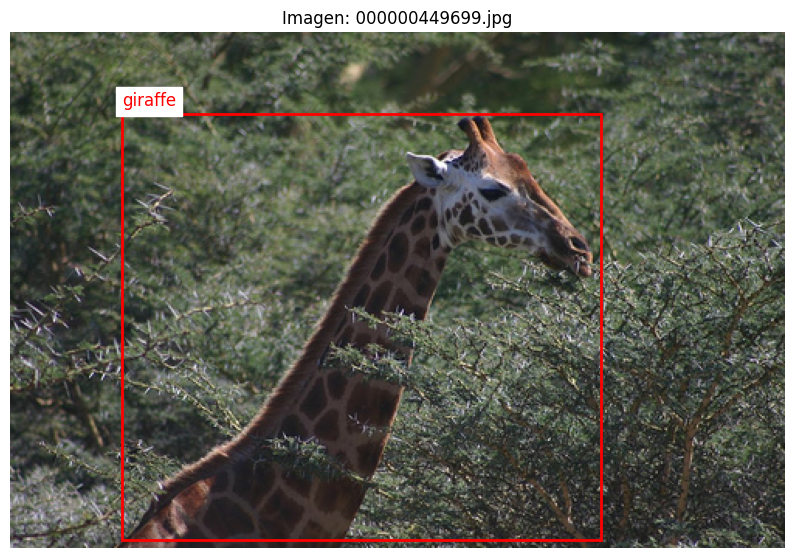

In [12]:
# Ruta del archivo de anotaciones y las imágenes del dataset personalizado
annotations_path = r"F:\Train_IA\train2017\BalancedDataset\annotations\custom_annotations.json"
images_dir = r"F:\Train_IA\train2017\BalancedDataset\images"

# Cargar las anotaciones del dataset personalizado
coco = COCO(annotations_path)

# Obtener una imagen aleatoria
image_ids = coco.getImgIds()
random_image_id = random.choice(image_ids)
image_info = coco.loadImgs([random_image_id])[0]

# Cargar la imagen
image_path = f"{images_dir}/{image_info['file_name']}"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB para matplotlib

# Obtener las anotaciones asociadas a la imagen
annotation_ids = coco.getAnnIds(imgIds=[random_image_id])
annotations = coco.loadAnns(annotation_ids)

# Crear la figura
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')

# Dibujar las anotaciones sobre la imagen
for annotation in annotations:
    # Dibujar el bounding box
    bbox = annotation['bbox']  # [x, y, width, height]
    x, y, width, height = bbox
    rect = plt.Rectangle((x, y), width, height, linewidth=2, edgecolor='red', facecolor='none')
    plt.gca().add_patch(rect)

    # Mostrar la categoría
    category_id = annotation['category_id']
    category_name = coco.loadCats([category_id])[0]['name']
    plt.text(x, y - 5, category_name, color='red', fontsize=12, backgroundcolor='white')

# Mostrar la imagen con las anotaciones
plt.title(f"Imagen: {image_info['file_name']}")
plt.show()

## Normalización de Imagenes

In [13]:
# Rutas de entrada y salida
input_images_dir = r"F:\Train_IA\train2017\BalancedDataset\images"
output_images_dir = r"F:\Train_IA\train2017\BalancedDataset\normalized_images"

# Crear el directorio de salida
os.makedirs(output_images_dir, exist_ok=True)

# Normalizar las imágenes
def normalize_image(image):
    """
    Normaliza la imagen a valores en el rango [0, 1].
    """
    image = image.astype(np.float32) / 255.0
    return image

# Procesar las imágenes
print("Normalizando imágenes...")
image_files = os.listdir(input_images_dir)

for image_file in tqdm(image_files, desc="Procesando imágenes"):
    # Cargar la imagen
    image_path = os.path.join(input_images_dir, image_file)
    image = cv2.imread(image_path)

    # Convertir BGR a RGB (si es necesario)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Normalizar la imagen
    normalized_image = normalize_image(image)

    # Convertir de nuevo a formato [0, 255] para guardar
    normalized_image_to_save = (normalized_image * 255).astype(np.uint8)

    # Guardar la imagen normalizada
    output_path = os.path.join(output_images_dir, image_file)
    cv2.imwrite(output_path, cv2.cvtColor(normalized_image_to_save, cv2.COLOR_RGB2BGR))

print(f"Imágenes normalizadas guardadas en '{output_images_dir}'")


Normalizando imágenes...


Procesando imágenes: 100%|██████████| 45460/45460 [15:15<00:00, 49.63it/s]  

Imágenes normalizadas guardadas en 'F:\Train_IA\train2017\BalancedDataset\normalized_images'


## Validación de imágenes con etiquetas

loading annotations into memory...
Done (t=9.93s)
creating index...
index created!


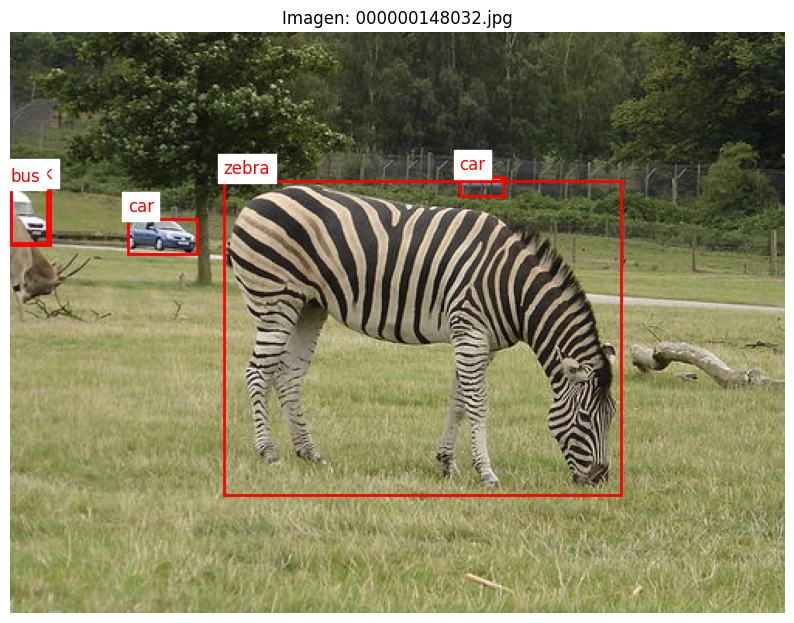

In [16]:
# Ruta del archivo de anotaciones y las imágenes del dataset personalizado
annotations_path = r"F:\Train_IA\train2017\BalancedDataset\annotations\custom_annotations.json"
images_dir = r"F:\Train_IA\train2017\BalancedDataset\normalized_images"

# Cargar las anotaciones del dataset personalizado
coco = COCO(annotations_path)

# Obtener una imagen aleatoria
image_ids = coco.getImgIds()
random_image_id = random.choice(image_ids)
image_info = coco.loadImgs([random_image_id])[0]

# Cargar la imagen
image_path = f"{images_dir}/{image_info['file_name']}"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir BGR a RGB para matplotlib

# Obtener las anotaciones asociadas a la imagen
annotation_ids = coco.getAnnIds(imgIds=[random_image_id])
annotations = coco.loadAnns(annotation_ids)

# Crear la figura
plt.figure(figsize=(10, 10))
plt.imshow(image)
plt.axis('off')

# Dibujar las anotaciones sobre la imagen
for annotation in annotations:
    # Dibujar el bounding box
    bbox = annotation['bbox']  # [x, y, width, height]
    x, y, width, height = bbox
    rect = plt.Rectangle((x, y), width, height, linewidth=2, edgecolor='red', facecolor='none')
    plt.gca().add_patch(rect)

    # Mostrar la categoría
    category_id = annotation['category_id']
    category_name = coco.loadCats([category_id])[0]['name']
    plt.text(x, y - 5, category_name, color='red', fontsize=12, backgroundcolor='white')

# Mostrar la imagen con las anotaciones
plt.title(f"Imagen: {image_info['file_name']}")
plt.show()

In [5]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision import datasets, models
import json
from pycocotools.coco import COCO
import os
from torch import nn, optim

In [6]:


# Definir los dispositivos (GPU si está disponible)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Cargar el archivo de anotaciones final
annotations_path = r"F:\Train_IA\train2017\BalancedDataset\annotations\custom_annotations.json"
coco = COCO(annotations_path)

# Obtener las categorías y asignarlas a un índice
categories = coco.loadCats(coco.getCatIds())
category_names = {cat['id']: cat['name'] for cat in categories}

# Cargar las imágenes y sus anotaciones
image_ids = coco.getImgIds()
images_info = coco.loadImgs(image_ids)

# Definir las transformaciones para el preprocesamiento de las imágenes
transform = transforms.Compose([
    transforms.ToTensor(),  # Convertir la imagen a un tensor
    transforms.Resize((224, 224)),  # Redimensionar las imágenes a 224x224
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalizar
])

# Función para cargar las anotaciones
def load_annotations(img_id):
    ann_ids = coco.getAnnIds(imgIds=[img_id])
    annotations = coco.loadAnns(ann_ids)
    labels = [ann['category_id'] for ann in annotations]
    
    # Filtrar las etiquetas para que estén dentro del rango de las categorías disponibles
    valid_labels = [label - 1 for label in labels if 1 <= label <= len(categories)]
    
    return valid_labels

# Crear un Dataset para PyTorch
class CocoDataset(torch.utils.data.Dataset):
    def __init__(self, coco, images_info, categories, transform=None):
        self.coco = coco
        self.images_info = images_info
        self.categories = categories
        self.transform = transform
        
    def __len__(self):
        return len(self.images_info)
    
    def __getitem__(self, idx):
        img_info = self.images_info[idx]
        img_id = img_info['id']
        img_path = os.path.join('F:/Train_IA/train2017/train2017', img_info['file_name'])
        
        image = datasets.folder.default_loader(img_path)  # Cargar la imagen
        if self.transform:
            image = self.transform(image)  # Aplicar las transformaciones
        
        labels = load_annotations(img_id)  # Obtener las etiquetas para la imagen
        labels_tensor = torch.zeros(len(self.categories))  # Crear un tensor para las etiquetas
        
        # Marcar las posiciones correspondientes en el tensor de etiquetas
        for label in labels:
            labels_tensor[label] = 1  # Marcar la categoría correspondiente
        
        return image, labels_tensor

# Crear el DataLoader
dataset = CocoDataset(coco, images_info, categories, transform=transform)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)


loading annotations into memory...
Done (t=9.51s)
creating index...
index created!


In [7]:
# Cargar un modelo preentrenado (ResNet-50)
model = models.resnet50(pretrained=True)

# Modificar la última capa para tener el número correcto de salidas (una por categoría)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, len(categories))  # Número de categorías

# Mover el modelo a la GPU
model = model.to(device)


f:\anaconda\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
f:\anaconda\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [8]:
# Función de pérdida para multilabel
criterion = nn.BCEWithLogitsLoss()

# Optimizador
optimizer = optim.Adam(model.parameters(), lr=1e-4)


In [9]:
import torch

# Verifica si CUDA está disponible
print("CUDA disponible:", torch.cuda.is_available())  # Debería devolver True

# Muestra el dispositivo actual
if torch.cuda.is_available():
    print("Dispositivo actual:", torch.cuda.current_device())
    print("Nombre de la GPU:", torch.cuda.get_device_name(torch.cuda.current_device()))
else:
    print("CUDA no está disponible.")


CUDA disponible: True
Dispositivo actual: 0
Nombre de la GPU: NVIDIA GeForce RTX 3070 Ti


In [ ]:
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    
    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Poner los gradientes a cero
        optimizer.zero_grad()
        
        # Realizar la inferencia
        outputs = model(inputs)
        
        # Calcular la pérdida
        loss = criterion(outputs, labels.float())
        
        # Retropropagación
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(dataloader)}")


Epoch [1/10], Loss: 0.08583280704469852
Epoch [2/10], Loss: 0.06292111077919382
Epoch [3/10], Loss: 0.05270991220619375
Epoch [4/10], Loss: 0.044119897477438885


In [ ]:
def predict(image_path, model, coco):
    model.eval()  # Poner el modelo en modo evaluación
    image = datasets.folder.default_loader(image_path)
    image = transform(image).unsqueeze(0).to(device)  # Aplicar transformaciones
    
    with torch.no_grad():
        outputs = model(image)
        
    # Aplicar sigmoid para obtener probabilidades
    probs = torch.sigmoid(outputs).cpu().numpy()
    
    # Obtener las etiquetas predichas
    predicted_labels = [i for i, p in enumerate(probs[0]) if p > 0.5]
    
    # Obtener los nombres de las categorías
    labels = [category_names[i] for i in predicted_labels]
    
    return labels

# Ejemplo de uso:
image_path = "F:/Train_IA/train2017/train2017/000000001271.jpg"
predicted_labels = predict(image_path, model, coco)
print(predicted_labels)
